In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('UsedCarSales.csv')

In [21]:
#Listed the columns that I wanted to drop from the data frame
columns_to_drop = [
    'Body_Type',
    'No_of_Owners',
    'Seating_Capacity',
    'Fuel_Type',
    'Fuel_Tank_Capacity(L)',
    "CC_Displacement",
    "Transmission",
    "Transmission_Type",
    "Emission",
    "Color"
]
df = df.drop(columns=columns_to_drop)

In [22]:
#Found the missing values  and droped them
missing_values = df.isnull().sum()


df = df.dropna()

In [23]:
#Found the duplicates and droped them
duplicates = df[df.duplicated()]


df = df.drop_duplicates()

In [24]:
#Printed the types for all of the columns
print(df.dtypes)




Car_Name          object
Make              object
Model             object
Make_Year          int64
Mileage_Run       object
Engine_Type       object
Power(BHP)       float64
Torque(Nm)       float64
Mileage(kmpl)     object
Price             object
dtype: object


In [25]:
# This is where i changed the format of the mileage and price to remove the , and then changed there type to a float for price and int for miles
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''), errors='coerce')
df['Mileage_Run'] = pd.to_numeric(df['Mileage_Run'].str.replace(',', ''), errors='coerce')
df['Price'] = df['Price'].astype(float)
print(df['Price'].dtype)
print(df['Mileage_Run'].dtype)
non_numeric_prices = df[df['Price'].isna()]
print(non_numeric_prices)

float64
int64
Empty DataFrame
Columns: [Car_Name, Make, Model, Make_Year, Mileage_Run, Engine_Type, Power(BHP), Torque(Nm), Mileage(kmpl), Price]
Index: []


In [26]:
#Formatting the price to two deciaml places
pd.options.display.float_format = '{:.2f}'.format
df['Price'] = df['Price'] / 100

In [27]:
#Checking for inconsistencies in the tpes when i changed the makes to lower 
df['Make'] = df['Make'].str.lower()
car_names = df['Make']


print(car_names)

0         volkswagen
1            hyundai
2              honda
3            renault
4            hyundai
           ...      
971          hyundai
972          hyundai
973          hyundai
974             ford
975    maruti suzuki
Name: Make, Length: 883, dtype: object


In [28]:
#Removing the outliers from the price
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [29]:
#pivot table for the make and price
pivot_table = df.pivot_table(index='Make', values='Price', aggfunc='mean')

print(pivot_table)

                 Price
Make                  
chevrolet      4535.00
datsun         2896.67
ford           7247.67
honda          7887.22
hyundai        6642.16
jeep          12900.00
kia           13690.00
mahindra      10787.06
maruti suzuki  5837.05
nissan         8842.50
renault        6583.54
skoda          6847.50
tata           7662.94
toyota         7284.00
volkswagen     5845.77


<Figure size 1200x600 with 0 Axes>

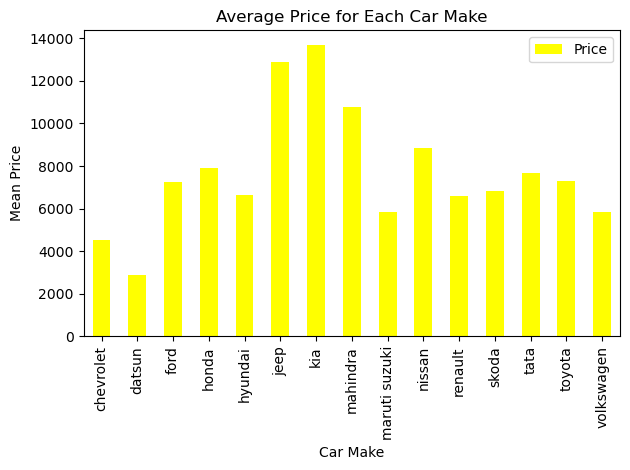

In [30]:
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', color='yellow')
plt.title('Average Price for Each Car Make')
plt.xlabel('Car Make')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

# SUB QUESTION ONE 
I used a bar graph to display the average price for each brand of car. The name brand or make of the car does make a difference in what price the car can bring. The makes Jeep and Kia on average bring over 12000 for a used car where chevorlet and datsun bring less than 5000 for there makes of cars

In [31]:
#Pivot table for the mileage, make in relation too price
pivot_table_mileage = df.pivot_table(index='Make', values=['Mileage_Run', 'Price'], aggfunc='mean')
print(pivot_table_mileage)

               Mileage_Run    Price
Make                               
chevrolet         60127.33  4535.00
datsun            57323.00  2896.67
ford              47907.19  7247.67
honda             42196.69  7887.22
hyundai           46157.83  6642.16
jeep              43091.00 12900.00
kia               18499.00 13690.00
mahindra          58467.18 10787.06
maruti suzuki     39112.00  5837.05
nissan            16453.50  8842.50
renault           33258.38  6583.54
skoda             72976.25  6847.50
tata              21357.29  7662.94
toyota            37687.60  7284.00
volkswagen        54128.15  5845.77


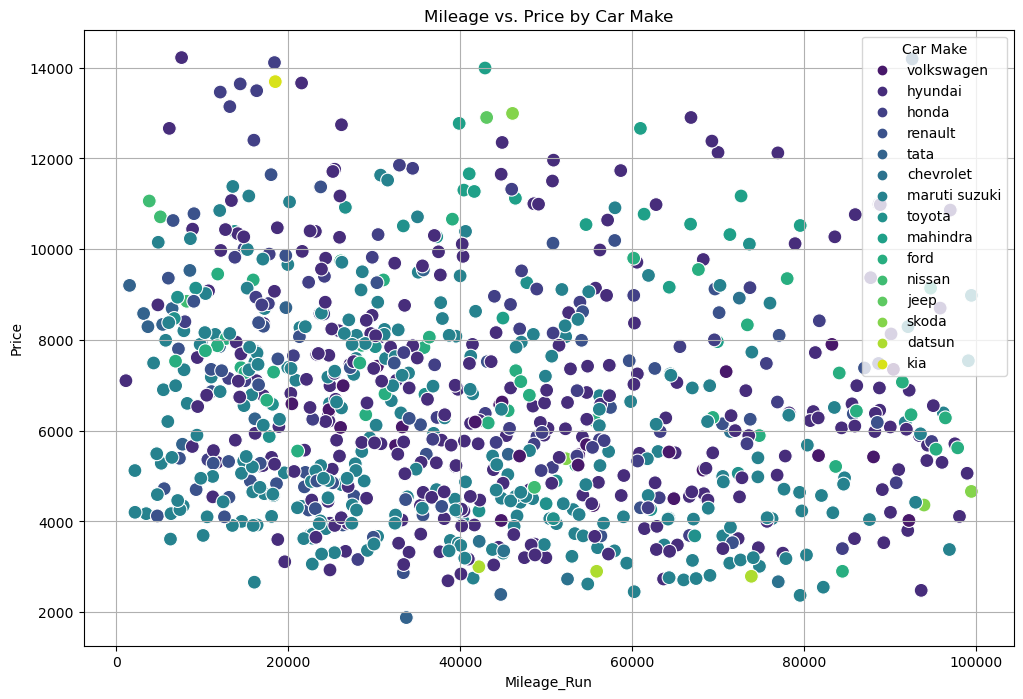

In [32]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Mileage_Run', y='Price', hue='Make', palette='viridis', s=100)
plt.title('Mileage vs. Price by Car Make')
plt.xlabel('Mileage_Run')
plt.ylabel('Price')
plt.legend(title='Car Make', loc='upper right')
plt.grid(True)
plt.show()

# SUB QUESTION 2

The scatterplot for the make, mileage and price had a weak negative non linear relation between each other with no strong outliers to the data. This scatterplot shows that on average cars with higher mileage fetch a lower price than cars with lower miles

In [33]:
# Pivot table for the price to power comparison 
pivot_table_power = df.pivot_table(index='Price', values='Power(BHP)', aggfunc='mean')
pivot_table_power.reset_index(inplace=True)
print(pivot_table_power)



       Price  Power(BHP)
0    1880.00       35.00
1    2370.00       67.10
2    2390.00       37.00
3    2450.00       67.10
4    2480.00       68.05
..       ...         ...
541 13690.00      113.40
542 13990.00      138.13
543 14110.00      119.35
544 14190.00      138.00
545 14220.00      113.00

[546 rows x 2 columns]


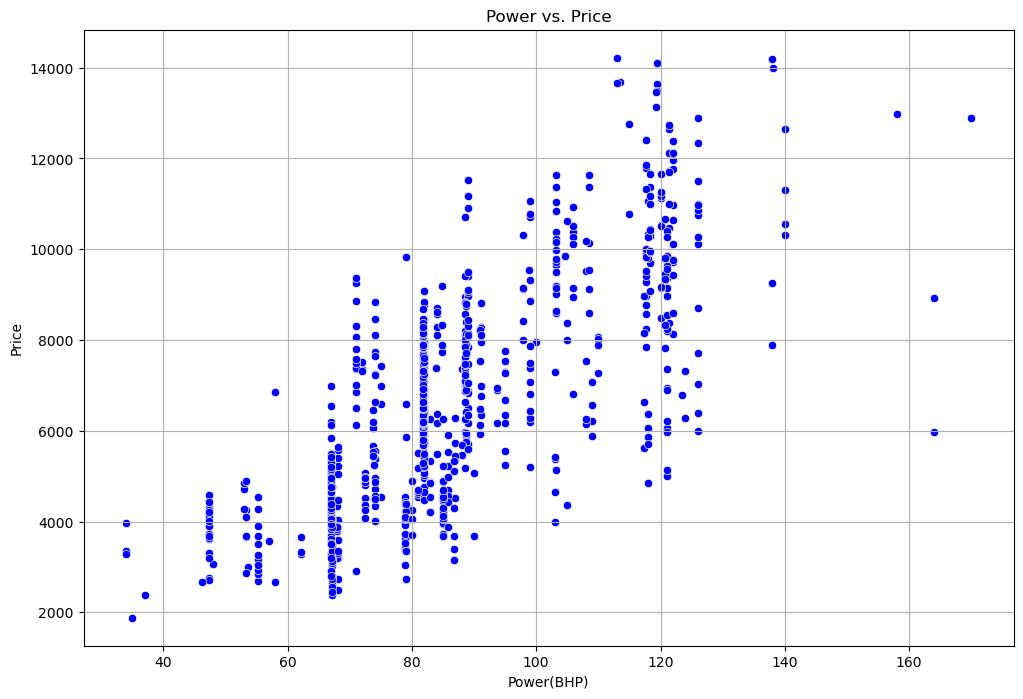

In [35]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Power(BHP)', y='Price', color='blue')
plt.title('Power vs. Price')
plt.xlabel('Power(BHP)')
plt.ylabel('Price')

plt.grid(True)
plt.show()

# SUB QUESTION 3

The scatterplot for the relation between horsepower and price has a moderate postive linear relation with some outliers over 160 power that could be related to the car having high mileage.